In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
from api_keys import weather_api_key
from citipy import citipy

In [4]:
output_data_file = "cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
# Create a set of random lat and lng combinations
# Identify nearest city for each lat, lng combination
lat_lngs = []
cities = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)

len(cities)

602

In [7]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    city_url = url + "&q=" + city
    
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    record_count += 1

    
    try:
        
        city_weather = requests.get(city_url).json()

        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | banikoara
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | zabid
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | pau dos ferros
Processing Record 11 of Set 1 | pointe michel
Processing Record 12 of Set 1 | ozgon
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | aripuana
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | port hardy
Processing Record 17 of Set 1 | port-gentil
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | mus
Processing Record 21 of Set 1 | mataura
Processing

Processing Record 39 of Set 4 | bukama
Processing Record 40 of Set 4 | appleton
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | urumqi
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | guajara-mirim
City not found. Skipping...
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | kokkola
Processing Record 48 of Set 4 | labuhan
Processing Record 49 of Set 4 | klichka
Processing Record 0 of Set 5 | upernavik
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | boende
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | ulaangom
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | isla mujeres
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | castro
Processing Record 10 of Set 5 | taoudenni
Processing Record 11 of Set 5 | lagoa
Processing Record 12 of

Processing Record 30 of Set 8 | severo-yeniseyskiy
Processing Record 31 of Set 8 | vale da amoreira
Processing Record 32 of Set 8 | mezhdurechenskiy
Processing Record 33 of Set 8 | along
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | merauke
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | puerto escondido
Processing Record 39 of Set 8 | kurchum
Processing Record 40 of Set 8 | kasongo-lunda
Processing Record 41 of Set 8 | provideniya
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | tuy hoa
Processing Record 44 of Set 8 | hambantota
Processing Record 45 of Set 8 | tsabong
Processing Record 46 of Set 8 | guhagar
Processing Record 47 of Set 8 | linhares
Processing Record 48 of Set 8 | mokhsogollokh
Processing Record 49 of Set 8 | alexandria
Processing Record 0 of Set 9 | qui nhon
Processing Record 1 of Set 9 | havre-saint-pierre
Processing Record 2 of Set 9 | temaraia
City 

Processing Record 19 of Set 12 | yulin
Processing Record 20 of Set 12 | montego bay
Processing Record 21 of Set 12 | quimper
Processing Record 22 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 23 of Set 12 | piacabucu
Processing Record 24 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 25 of Set 12 | pampa
Processing Record 26 of Set 12 | mareeba
Processing Record 27 of Set 12 | tavira
Processing Record 28 of Set 12 | mujiayingzi
Processing Record 29 of Set 12 | sumter
Processing Record 30 of Set 12 | utiroa
City not found. Skipping...
Processing Record 31 of Set 12 | kalmunai
Processing Record 32 of Set 12 | bilma
Processing Record 33 of Set 12 | saint-francois
Processing Record 34 of Set 12 | ponta delgada
Processing Record 35 of Set 12 | vieste
Processing Record 36 of Set 12 | richards bay
Processing Record 37 of Set 12 | sabang
Processing Record 38 of Set 12 | tenenkou
Processing Record 39 of Set 12 | pierre
Processing Record 40 of Set 12 | 

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [9]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,banikoara,11.2985,2.4386,77.41,77,69,4.47,BJ,1626731686
1,georgetown,5.4112,100.3354,80.89,88,20,1.99,MY,1626731507
2,constitucion,-35.3333,-72.4167,54.55,67,18,10.80,CL,1626731687
3,albany,42.6001,-73.9662,81.25,78,93,0.29,US,1626731687
4,zabid,14.1951,43.3152,87.85,57,100,12.77,YE,1626731688


In [10]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,20.433311,16.599507,70.371964,71.341071,53.639286,7.301500,1.626732e+09
std,32.020447,87.644408,14.564432,20.699566,38.984083,5.351263,8.374299e+01
min,-54.800000,-175.200000,36.480000,7.000000,0.000000,0.000000,1.626731e+09
25%,-6.144725,-63.777825,59.205000,61.000000,12.000000,3.440000,1.626732e+09
50%,24.621700,21.232450,72.240000,77.000000,57.000000,5.750000,1.626732e+09
75%,46.446825,88.153150,80.875000,86.000000,94.000000,10.052500,1.626732e+09
max,78.218600,178.416700,109.540000,100.000000,100.000000,33.580000,1.626732e+09


In [11]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index                               
dirty_city_data

Int64Index([], dtype='int64')

In [12]:
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,banikoara,11.2985,2.4386,77.41,77,69,4.47,BJ,1626731686
1,georgetown,5.4112,100.3354,80.89,88,20,1.99,MY,1626731507
2,constitucion,-35.3333,-72.4167,54.55,67,18,10.80,CL,1626731687
3,albany,42.6001,-73.9662,81.25,78,93,0.29,US,1626731687
4,zabid,14.1951,43.3152,87.85,57,100,12.77,YE,1626731688


In [13]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

In [14]:
# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

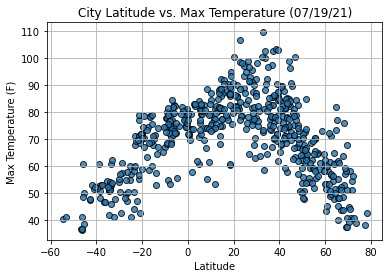

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("output_data/Fig1.png")
plt.show()

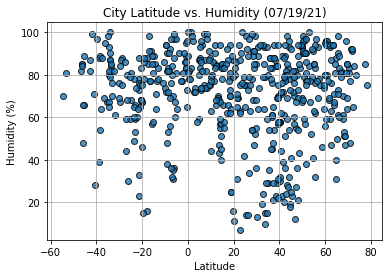

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

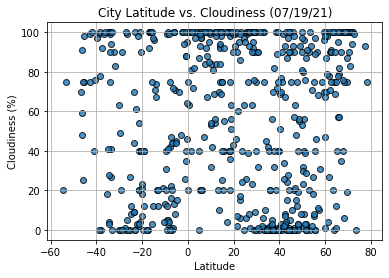

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

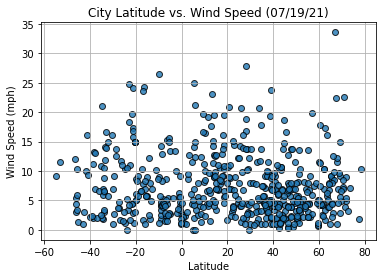

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()

In [20]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-value is: 0.3610295706491335


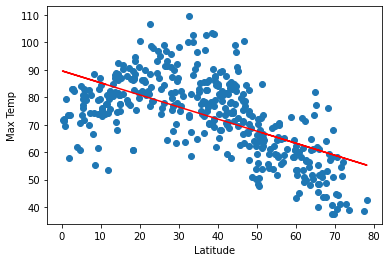

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.6765600675834527


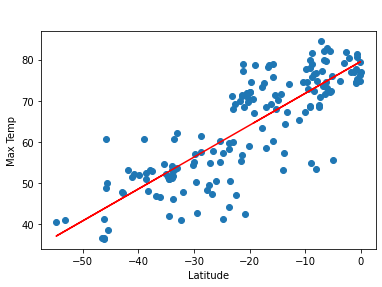

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The r-value is: 0.00024197925538855638


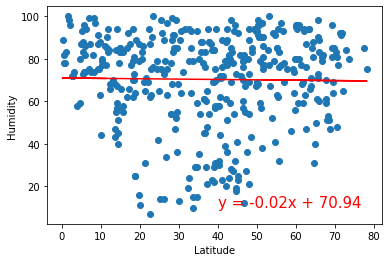

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.00024153468377735153


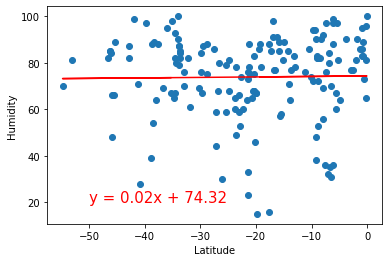

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The r-value is: 0.012261951755941157


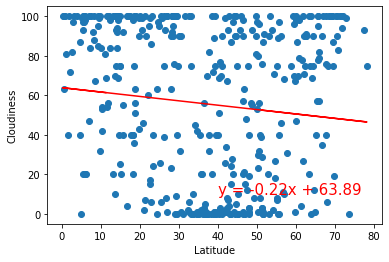

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.014150241485370892


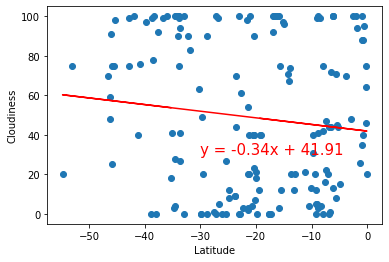

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-value is: 0.012234789760707361


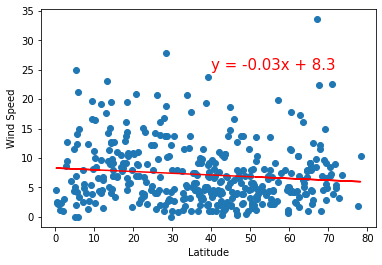

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.010587406705064976


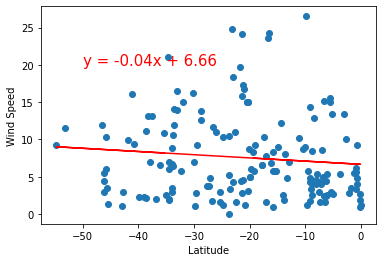

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))